In [47]:
# Import libraries

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import normalize

import warnings 
warnings.filterwarnings('ignore')

In [48]:
# Run this cell for more readable visuals 

large = 22; med = 16; small = 10
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'axes.linewidth': 2,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.style.use('seaborn-v0_8-white')
plt.rcParams.update(params)

%matplotlib inline

In [49]:
df = pd.read_csv("bacteria_train.csv")

In [50]:
df.head()

,Perc_population,Spreading_factor
0,1.535,0.190708
1,5.555,0.326928
2,-0.277,-0.459699
3,1.724,-0.193013
4,-0.550,-0.835745


In [51]:
x, y = df[["Perc_population"]], df["Spreading_factor"]

In [52]:
maxdeg = 10
x_poly = PolynomialFeatures(maxdeg, include_bias=False).fit_transform(x)

print(x_poly.shape)
# x_poly= normalize(x_poly, axis=0)

print(x_poly.shape)


(423, 10)
(423, 10)


In [53]:
alpha_list = np.linspace(10,120,1000)

In [54]:
coeff_list = []

for a in alpha_list:
    ridge_reg = Ridge(alpha=a)

    ridge_reg.fit(x_poly, y)

    coeff_list.append(ridge_reg.coef_)

In [55]:
ridge_trend = np.array(coeff_list).T

In [56]:
np.abs(ridge_trend[0])

array([0.27432096, 0.27370806, 0.27310204, 0.27250249, 0.27190958,
       0.27132298, 0.27074261, 0.27016831, 0.26959993, 0.26903744,
       0.26848056, 0.26792939, 0.26738364, 0.26684328, 0.26630817,
       0.26577814, 0.26525321, 0.26473323, 0.26421817, 0.26370776,
       0.26320213, 0.26270099, 0.26220437, 0.26171217, 0.26122431,
       0.26074067, 0.2602612 , 0.25978586, 0.2593145 , 0.25884709,
       0.25838363, 0.25792387, 0.25746794, 0.25701569, 0.256567  ,
       0.25612192, 0.25568031, 0.25524211, 0.25480729, 0.25437582,
       0.25394765, 0.25352262, 0.25310081, 0.25268207, 0.25226636,
       0.25185371, 0.25144402, 0.25103728, 0.25063336, 0.25023229,
       0.249834  , 0.24943847, 0.24904561, 0.24865545, 0.24826791,
       0.24788291, 0.24750047, 0.24712055, 0.24674308, 0.24636807,
       0.24599543, 0.24562521, 0.24525725, 0.24489164, 0.24452828,
       0.24416716, 0.24380825, 0.24345153, 0.24309693, 0.24274447,
       0.24239406, 0.24204574, 0.24169947, 0.24135518, 0.24101

Text(0, 0.5, '$\\beta$ values')

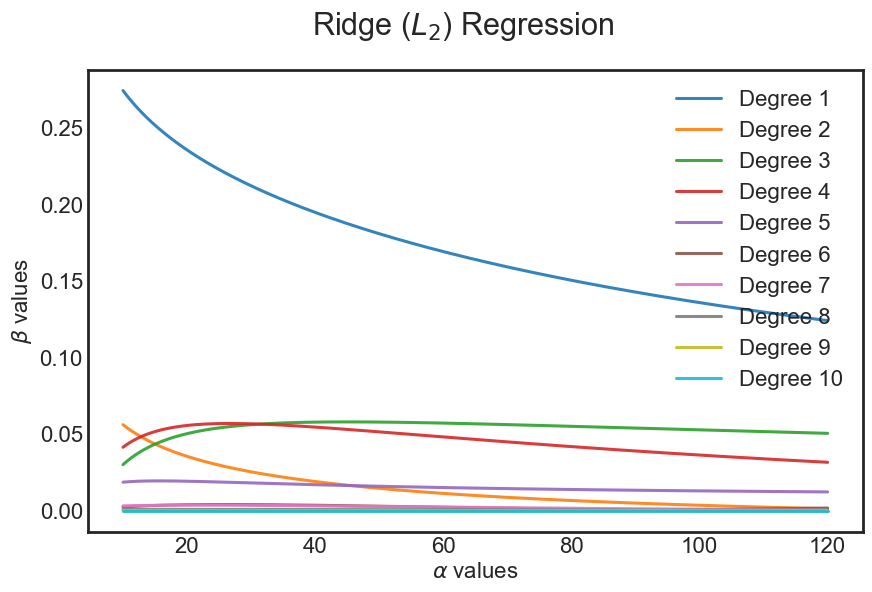

In [57]:
fig, ax = plt.subplots(figsize=(10,6))

for i in range(maxdeg):

    ax.plot(alpha_list, np.abs(ridge_trend[i]), 
    # color=colors[i],
            alpha = 0.9, label = f'Degree {i+1}', lw=2.2)
    ax.legend(loc="best")

fig.suptitle(r"Ridge ($L_2$) Regression")
ax.set_xlabel(r"$\alpha$ values")
ax.set_ylabel(r"$\beta$ values")

In [58]:
alpha_list = np.linspace(1e-4,1e-1,1000)


In [62]:
coeff_list = []

for a in alpha_list:

    lasso_reg = Lasso(alpha=a, max_iter=2500)

    lasso_reg.fit(x_poly, y)

    coeff_list.append(lasso_reg.coef_)



In [63]:
lasso_trend = np.array(coeff_list).T

lasso_trend.shape

(10, 1000)

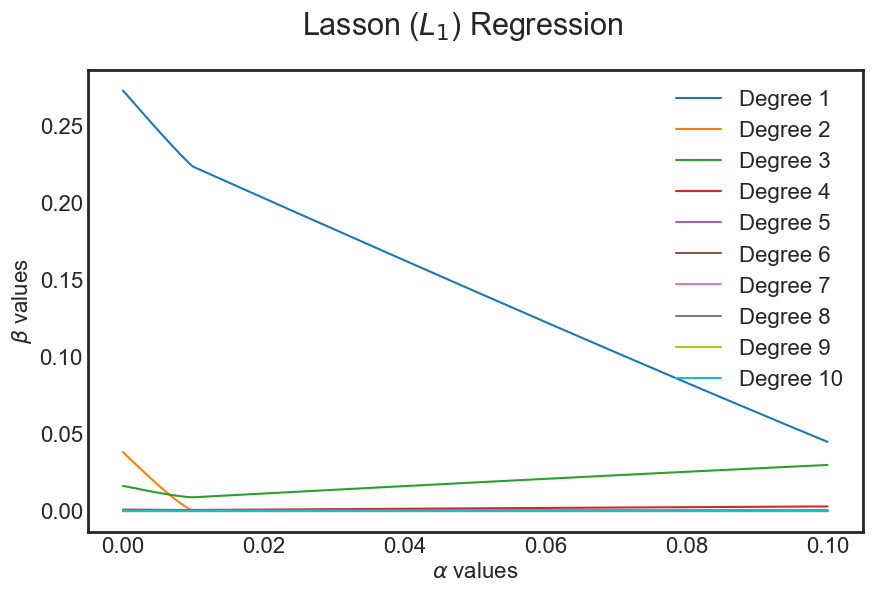

In [64]:
fig, ax = plt.subplots(figsize=(10,6))

for i in range(maxdeg):
    ax.plot(alpha_list, np.abs(lasso_trend[i]),
            label=f"Degree {i+1}")



fig.suptitle(r"Lasson ($L_1$) Regression")
ax.set_xlabel(r"$\alpha$ values")
ax.set_ylabel(r"$\beta$ values")
ax.legend(loc="best")

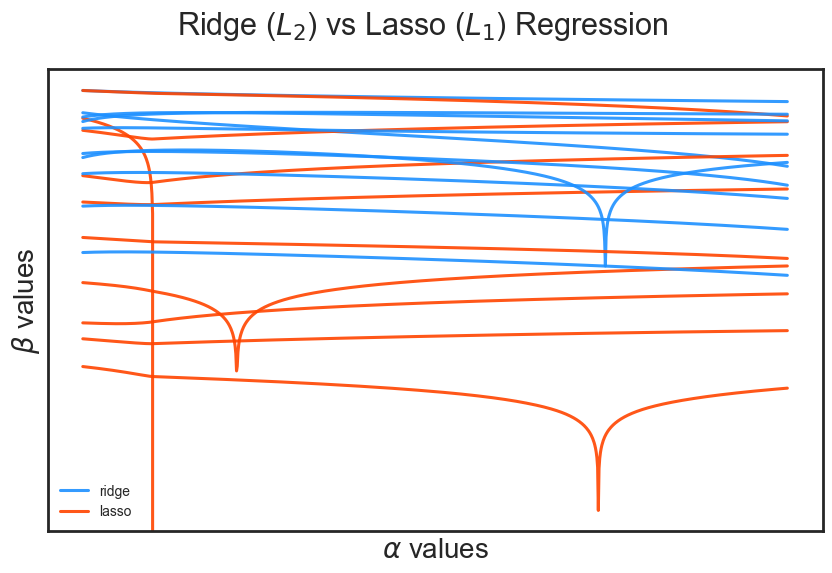

In [65]:
colors = ['dodgerblue', 'orangered']
fig, ax = plt.subplots(figsize = (10,6))
for i in range(maxdeg):
    if i == 0:
        labels = ["ridge", "lasso"]
    else:
        labels = [None, None]
    ax.semilogy(alpha_list, np.abs(ridge_trend[i]), 
    color=colors[0],
                alpha = 0.9, lw=2.2, label = labels[0])
    ax.semilogy(alpha_list, np.abs(lasso_trend[i]), 
    color=colors[1],
                alpha = 0.9, lw=2.2, label = labels[1])
    ax.legend(loc='best',fontsize=10)
    ax.set_xlabel(r'$\alpha$ values', fontsize=20)
    ax.set_ylabel(r'$\beta$ values', fontsize=20)
    ax.tick_params(axis='both',which='both',bottom=False,top=False,
                labelbottom=False,labelleft=False)

fig.suptitle(r'Ridge ($L_2$) vs Lasso ($L_1$) Regression');